In [1]:
import pickle
import numpy as np
from nltk.corpus import wordnet as wn

In [2]:
pwd

u'/Users/kwheeler/Desktop/LIFE/life_movie_project'

In [3]:
cd life_matrices/

/Users/kwheeler/Desktop/LIFE/life_movie_project/life_matrices


In [4]:
# --- variables that change based on which file is running --- #
### should have one place where all variables are defined 
### so only one cell needs to be updated when running different movie parts

file = open('part1_raw_data.pkl', 'rb')
part1_file = pickle.load(file)

In [5]:
#need to pass list of all_features through wn.check_list
# raw annotations, not wn compatible yet
raw_feature_list = part1_file['all_features']  # list of all features
feature_dict = part1_file['features']  # dictionary, keys = timepoints, values = features 
#print raw_feature_list
#print feature_dict

In [6]:
# --- define functions for creating the feature_list --- #

def check_list(listname): #check a list using check_wn function
    for i in listname:
        check_wn(i)
    return present

def check_wn(feature): #check if a feature is in WordNet
    if wn.synsets(feature) == []:
        missing.append(feature)
    else:
        present.append(feature)
    return present

    
def make_list_wncomp(listname): #make the features in a list (present) WordNet compatible
    for feature in listname:
        f = wn.synsets(feature)
        if f[0] not in feature_list:
            feature_list.append(f[0])
    return feature_list


def find_hypernyms(feat_list): #from a list of features, append hypernyms to a list
    for i in feat_list:
        f = [i]
        while f!=[]:
            hyplist.append(f[0])
            f = f[0].hypernyms()
    return hyplist


def compare_lists(list1,list2): #compare 2 lists; append elements of list1 to list2 if they 
                                #are not already present
    for i in list1:
        if i not in list2:
            list2.append(i)
    return list2


In [7]:
# --- annotations --> feature list for matrix, feature_dict --- #
present = []
missing = []  # some "missing" words are mispelled or just need a synonym 
              # and should be manually added back

check_list(raw_feature_list)

hyplist = []
feature_list = []

print len(raw_feature_list) == (len(present))+(len(missing))

True


In [8]:
# not entirely sure why I removed these...
removed_words = ['Seabed', '4', '2', '7', 'varies', '1', 'circles', '3', 'hippos', 'two', 'plants', 'spots', '5']
for word in removed_words:
    if word in present:
        present.remove(word)

In [9]:
#print matrix_list

In [10]:
# --- define functions for setting up the matrix and timepoints --- #

#might need to switch f_list and timepoint to flip matrix?
def create_matrix(timepoint,f_list):
    X = np.zeros((len(timepoint),len(f_list)))  #build the matrix of zeros based on list length of features and time
    return X


# Not sure this is correct
#in matrix, change 0s to 1s when a feature is present at that timepoint
def update_matrix(all_features_list, matrix_list, matrix_name, time):
    for f in all_features_list:
        if f in matrix_list:
            i = matrix_list.index(f)
            matrix_name[time,i] = 1  # specifically, issue with this line --> no iteration for time?
    return matrix_name


def set_indices(feat_list):
    for i,x in enumerate(feat_list):
        index_list.append((i,x))
    #return index_list   


# --- replacing this code ---
def tp(movie_length):   
    tp = range(0, movie_length,2) #2 is for 2 second intervals
    return tp #return list of timepoints
# --- revised code ---
#tp = feature_dict.keys()  # except this doesn't work right!!
#  ^use this new code in revised notebook, if that happens...


def compute_list(raw_list):
    #initialize lists <-- but doesn't actually work :(
    #present = [] 
    #missing = []
    #feature_list = []
    #hyplist = []
    
    #run functions
    present = check_list(raw_list)  # returns present
    feature_list = make_list_wncomp(present)  # returns feature_list
    hyplist = find_hypernyms(feature_list)  # returns hyplist
    feature_list = compare_lists(hyplist,feature_list)  #returns list2 without duplicates
    return feature_list


matrix_list = compute_list(raw_feature_list)

In [11]:
tp_list = tp(len(feature_dict)*2)  # define timepoints

index_list = []  # used for set_indices later
set_indices(matrix_list)  # index each feature for "feature" axis of matrix

In [12]:
wn_feature_dict = {}
for key in feature_dict:
    present = [] 
    missing = []
    feature_list = []
    hyplist = []
    #print key
    key_list = feature_dict[key]
    wn_key_list = compute_list(key_list)
    #print key, key_list, wn_key_list
    wn_feature_dict[key] = wn_key_list
#print wn_feature_dict


    

In [13]:
#  tp_list is timepoints = X axis
#  feature_list is features = Y axis
#  feature_dict has: keys = timepoints, values = features

the_matrix = create_matrix(tp_list, matrix_list)

In [14]:
index_dict = {key: value for value, key in index_list}

In [15]:
index_list

[(0, Synset('water.n.01')),
 (1, Synset('light.n.01')),
 (2, Synset('splash.n.01')),
 (3, Synset('music.n.01')),
 (4, Synset('bubble.n.01')),
 (5, Synset('words.n.01')),
 (6, Synset('earth.n.01')),
 (7, Synset('narrative.n.01')),
 (8, Synset('ocean_floor.n.01')),
 (9, Synset('seashore.n.01')),
 (10, Synset('dolphinfish.n.02')),
 (11, Synset('swimming.n.01')),
 (12, Synset('multiple.n.01')),
 (13, Synset('seaweed.n.01')),
 (14, Synset('circle.n.01')),
 (15, Synset('fish.n.01')),
 (16, Synset('jumping.n.01')),
 (17, Synset('eating.n.01')),
 (18, Synset('catching.n.01')),
 (19, Synset('spatter.n.02')),
 (20, Synset('hover.v.01')),
 (21, Synset('hummingbird.n.01')),
 (22, Synset('flight.n.02')),
 (23, Synset('flower.n.01')),
 (24, Synset('wasp.n.01')),
 (25, Synset('crop-dusting.n.01')),
 (26, Synset('bug.n.01')),
 (27, Synset('ant.n.01')),
 (28, Synset('frog.n.01')),
 (29, Synset('dragonfly.n.01')),
 (30, Synset('fight.n.02')),
 (31, Synset('bird.n.01')),
 (32, Synset('hippo.n.01')),
 (33

In [16]:
wn_feature_dict
#the_matrix.shape
#the_matrix

{0: [Synset('water.n.01'),
  Synset('light.n.01'),
  Synset('splash.n.01'),
  Synset('music.n.01'),
  Synset('binary_compound.n.01'),
  Synset('compound.n.02'),
  Synset('chemical.n.01'),
  Synset('material.n.01'),
  Synset('substance.n.01'),
  Synset('matter.n.03'),
  Synset('physical_entity.n.01'),
  Synset('entity.n.01'),
  Synset('actinic_radiation.n.01'),
  Synset('electromagnetic_radiation.n.01'),
  Synset('radiation.n.01'),
  Synset('energy.n.01'),
  Synset('physical_phenomenon.n.01'),
  Synset('natural_phenomenon.n.01'),
  Synset('phenomenon.n.01'),
  Synset('process.n.06'),
  Synset('noise.n.01'),
  Synset('sound.n.04'),
  Synset('happening.n.01'),
  Synset('event.n.01'),
  Synset('psychological_feature.n.01'),
  Synset('abstraction.n.06'),
  Synset('auditory_communication.n.01'),
  Synset('communication.n.02')],
 2: [Synset('water.n.01'),
  Synset('light.n.01'),
  Synset('splash.n.01'),
  Synset('bubble.n.01'),
  Synset('music.n.01'),
  Synset('binary_compound.n.01'),
  Synse

In [17]:
def update_matrix(feature_dict, matrix_index_dict, matrix_name):
    for key, values in feature_dict.iteritems():
        for value in values:
            the_matrix[key/2, index_dict[value]] = 1

update_matrix(wn_feature_dict, index_dict, the_matrix)

In [18]:
the_matrix

array([[ 1.,  1.,  1., ...,  0.,  0.,  0.],
       [ 1.,  1.,  1., ...,  0.,  0.,  0.],
       [ 1.,  1.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [24]:
% matplotlib inline
from matplotlib import pyplot as pl
#pl.imshow(the_matrix)
#pl.show()

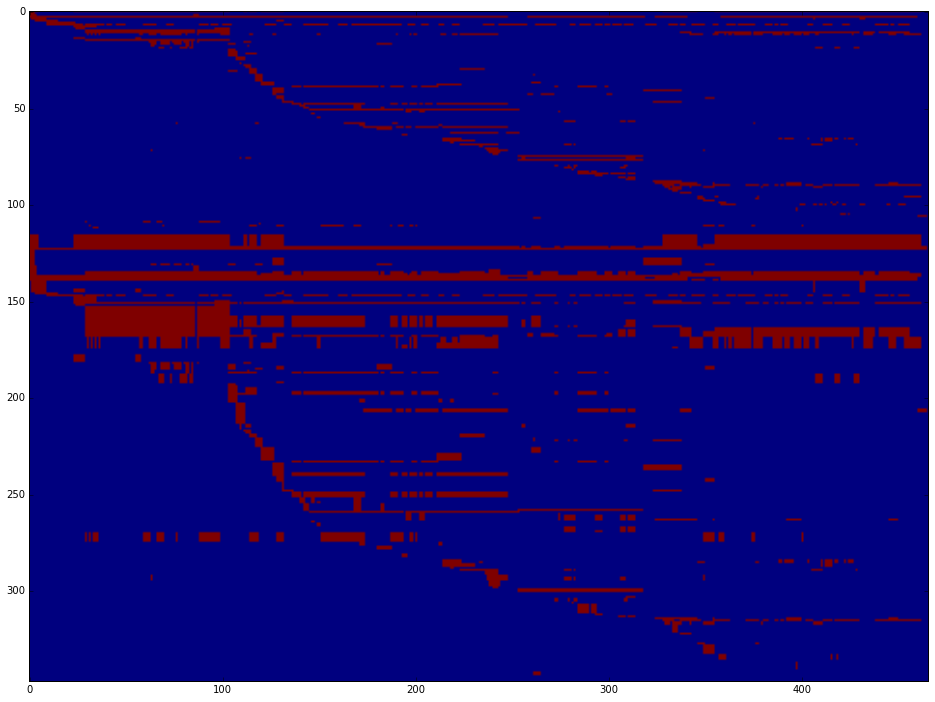

In [20]:
# X-axis = timepoint, Y-axis = feature
transposed = the_matrix.T
pl.figure(figsize=(24, 12))
pl.imshow(transposed)
pl.show()

In [21]:
u, s, v = np.linalg.svd(the_matrix, full_matrices=False)

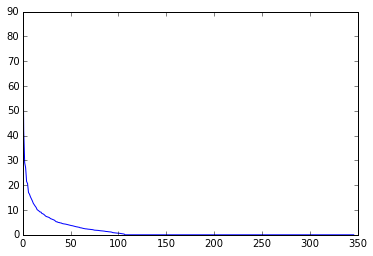

In [22]:
pl.plot(s);

In [23]:
#np.linalg.inv(np.dot(the_matrix.T, the_matrix))